<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/Hadwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# 상수 정의
batch_size = 128    # batch size
num_classes = 10    # 분류 클래스 종류(0 ~ 9 까지의 숫자)
epochs = 100        # training 횟수

In [3]:
# 25개 샘플 이미지 Display하는 함수 정의
def show_sample(images, labels, sample_count=25):
    grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
    grid_count = min(grid_count, len(images), len(labels))

    plt.figure(figsize=(2*grid_count, 2*grid_count))

    for i in range(sample_count):
        plt.subplot(grid_count, grid_count, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xlabel(labels[i])
    
    plt.show()

In [4]:
# 특정한 숫자(Digit)만 25개 Display 함수 정의
def show_sample_digit(images, labels, digit, sample_count = 25):
    grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
    grid_count = min(grid_count, len(images), len(labels))

    plt.figure(figsize = (2 * grid_count, 2 * grid_count))
    i = 0
    digit_count = 0
    
    while digit_count < sample_count:
        i += 1
        if (digit == labels[i]):
            plt.subplot(grid_count, grid_count, digit_count+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[i], cmap=plt.cm.gray)
            plt.xlabel(labels[i])
            digit_count += 1
    
    plt.show()

In [5]:
# digit의 이미지와 예측한 label을 Display 함수 정의
def show_digit_image(image):
     # Draw digit image
     fig = plt.figure()
     ax = fig.add_subplot(1, 1, 1)

     # Major ticks every 20, minor ticks every 5
     major_ticks = np.arange(0, 29, 5)
     minor_ticks = np.arange(0, 29, 1)
     ax.set_xticks(major_ticks)
     ax.set_xticks(minor_ticks, minor=True)
     ax.set_yticks(major_ticks)
     ax.set_yticks(minor_ticks, minor=True)

     # corresponding grid
     ax.grid(which = 'both')

     # different settings for the grids:
     ax.grid(which='minor', alpha=0.2)
     ax.grid(which='major', alpha=0.5)
     ax.imshow(image, cmap=plt.cm.binary)

     plt.show()

In [6]:
# MNIST dataset 다운로드
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

In [11]:
# Input image Normalization
train_images = train_images / 255.0     # 픽셀값을 0~1 범위로 변환
test_images = test_images / 255.0

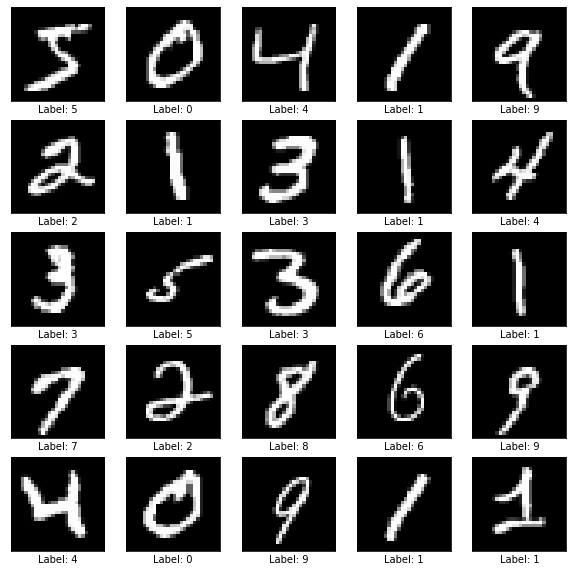

In [12]:
# 샘플 이미지 Display
show_sample(train_images, ['Label: %s' % label for label in train_labels])

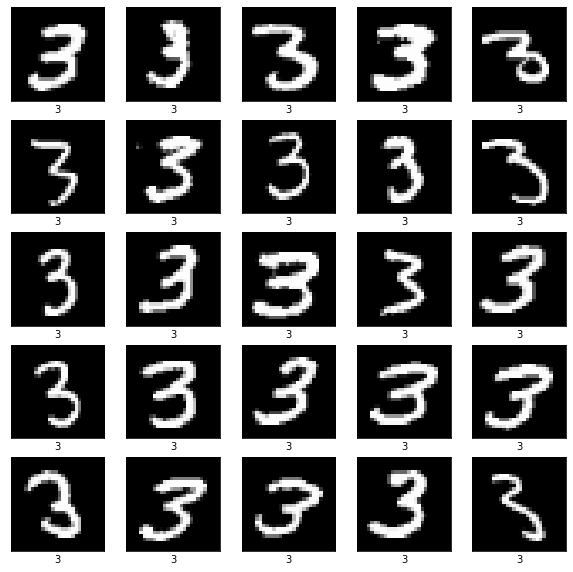

In [13]:
# training dataset에서 특정한 숫자만 Display
show_sample_digit(train_images, train_labels, 3)

In [14]:
# 분류 모델 생성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    # keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [15]:
# 모델 저장 옵션 정의
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only = True)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                        

In [17]:
# 모델 학습
history = model.fit(train_images, train_labels,
                    validation_data = (test_images, test_labels),
                    epochs = epochs, batch_size = batch_size,
                    callbacks = [modelCheckpoint])

Epoch 1/100
469/469 [==============================] - 12s 10ms/step - loss: 0.2548 - accuracy: 0.9234 - val_loss: 0.0566 - val_accuracy: 0.9812
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0442 - val_accuracy: 0.9852
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0328 - val_accuracy: 0.9885
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0314 - val_accuracy: 0.9900
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0294 - val_accuracy: 0.9

In [18]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9931
Test accuracy:  0.9930999875068665


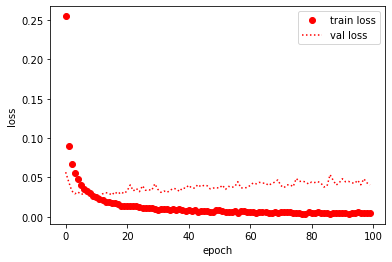

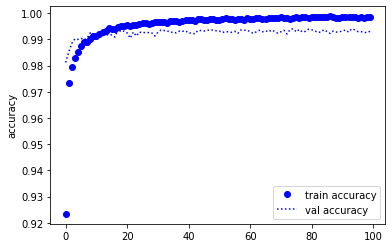

In [19]:
# loos Value, accuracy Graph
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label = 'train loss')           # train loss
loss_ax.plot(history.history['val_loss'], 'r:', label = 'val loss')         # validation loss
loss_ax.set_xlabel('epoch')                                                 # x축 label은 epoch
loss_ax.set_ylabel('loss')                                                  # y축 label은 loss
loss_ax.legend(loc = 'upper right')                                          # legend 위치는 왼쪽 위

acc_ax.plot(history.history['accuracy'], 'bo', label = 'train accuracy')    # train accuracy
acc_ax.plot(history.history['val_accuracy'], 'b:', label = 'val accuracy')  # validation accuracy
acc_ax.set_ylabel('accuracy')                                               # y축 label은 accuracy
acc_ax.legend(loc='lower right')                                             # legend 위치는 왼쪽 위

plt.show()

In [20]:
# 모델을 통해 digit label 예측
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


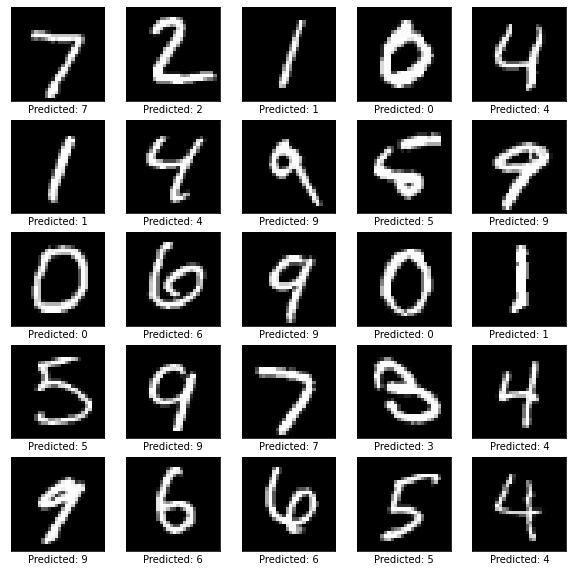

In [21]:
# 결과 Display
show_sample(test_images, ['Predicted: %d' % np.argmax(result) for result in predictions])

Number is  7


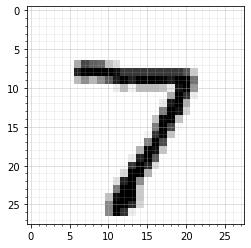

In [22]:
# 특정한 숫자의 이미지와 예측한 label Display
selected_digit = 0

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2i' % (result_number))

show_digit_image(test_images[selected_digit])